## Model Comparison - Full Feature Set

Author: Daniel Hui

License: MIT

This notebook exaluates a few different modelling options for the data, for comparison

In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Load Dataset

In [3]:
checkout_target_df = pd.read_csv('01_Data/"Checkout_Features_Target.csv',index_col=0)

In [4]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,page,dim,avg_rating,tot_ratings,tot_reviews,cntry_code 0,cntry_code 1,cntry_code 2,cntry_code 3,cntry_code 4,pub_code 2,pub_code 3,pub_code 4,pub_code 5,pub_code 6,pub_code 7,last year,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
0,3161651,0,1,1,2016,0,0,1,0,0,0,0,0,0,0,0,185,21,3.7000,4,1,0,1,0,0,0,0,0,0,1,0,0,8,0,4,8,16,11,11,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0
1,3203068,0,1,1,2012,1,0,0,0,0,0,0,0,0,0,0,269,22,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,5,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2851182,0,1,1,2013,0,0,1,0,0,0,1,0,0,0,0,24,26,0.0000,0,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,2,8,4,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [5]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,page,dim,avg_rating,tot_ratings,tot_reviews,cntry_code 0,cntry_code 1,cntry_code 2,cntry_code 3,cntry_code 4,pub_code 2,pub_code 3,pub_code 4,pub_code 5,pub_code 6,pub_code 7,last year,30 Days,90 Days,180 Days,365 Days,Branches,Copies,bal,bea,bro,cap,cen,col,dlr,dth,fre,glk,gwd,hip,idc,lcy,mag,mgm,mon,net,nga,nhy,qna,rbe,spa,swt,uni,wal,wts
count,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000
mean,2249489.5370,0.4882,1.0000,0.8745,2001.7685,0.2818,0.0785,0.6339,0.0366,0.0208,0.0398,0.1598,0.0489,0.0244,0.0188,0.0334,253.6456,23.5568,3.4695,11.9267,1.0391,0.4745,0.2916,0.0024,0.0045,0.0060,0.0800,0.2241,0.2409,0.1810,0.0415,0.0119,4.7136,0.7362,2.4057,4.9254,9.6391,2.5310,2.9093,0.1174,0.0732,0.0849,0.0721,0.8950,0.0657,0.0346,0.0939,0.0354,0.0549,0.1100,0.0413,0.0233,0.1043,0.0506,0.0203,0.0334,0.1310,0.0693,0.0258,0.0475,0.0667,0.0336,0.1018,0.0589,0.0153,0.0708
std,948991.6013,0.4999,0.0000,0.3313,16.7969,0.4499,0.2689,0.4817,0.1878,0.1428,0.1954,0.3665,0.2157,0.1543,0.1357,0.1797,143.0197,3.4577,3.8609,71.7034,6.8293,0.4994,0.4545,0.0484,0.0671,0.0772,0.2714,0.4170,0.4276,0.3850,0.1994,0.1083,15.3648,5.3192,13.1315,20.8448,32.4741,3.1156,4.8107,0.3219,0.2605,0.2787,0.2586,0.3066,0.2478,0.1827,0.2917,0.1848,0.2278,0.3129,0.1991,0.1509,0.3057,0.2191,0.1410,0.1796,0.3374,0.2540,0.1584,0.2127,0.2495,0.1801,0.3024,0.2354,0.1227,0.2565
min,75.0000,0.0000,1.0000,0.0000,1877.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1877301.0000,0.0000,1.0000,1.0000,1997.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,176.0000,22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2566955.0000,0.0000,1.0000,1.0000,2008.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,253.0000,23.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2969785.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,306.0000,24.0000,7.5000,5.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,2.0000,3.0000,7.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0

In [6]:
checkout_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27211 entries, 0 to 27210
Data columns (total 66 columns):
BibNum          27211 non-null int64
Checkout        27211 non-null int64
Title           27211 non-null int64
ISBN            27211 non-null int64
Year            27211 non-null int64
Fiction         27211 non-null int64
Language        27211 non-null int64
Nonfiction      27211 non-null int64
Biography       27211 non-null int64
Large Print     27211 non-null int64
Picture         27211 non-null int64
Children        27211 non-null int64
Teen            27211 non-null int64
Mystery         27211 non-null int64
AfAm            27211 non-null int64
Comic           27211 non-null int64
page            27211 non-null int64
dim             27211 non-null int64
avg_rating      27211 non-null float64
tot_ratings     27211 non-null int64
tot_reviews     27211 non-null int64
cntry_code 0    27211 non-null int64
cntry_code 1    27211 non-null int64
cntry_code 2    27211 non-null int64
c

In [7]:
len(checkout_target_df)

27211

### Train / Test / Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [9]:
y = checkout_target_df["Checkout"]
X = checkout_target_df.drop(["Checkout","BibNum"],axis=1)

#hold out portion of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) #keep at 20 to be consistent

#hold out 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=50) 

In [10]:
print(len(X_train),len(X_val),len(X_test))

16326 5442 5443


### KNN Classifier
This first part will grid search for the best Neighbor value

In [11]:
for i in range(5,31,5):
    adjacents = i
    knn = KNeighborsClassifier(n_neighbors=adjacents)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    print(adjacents, " neighbors. Accuracy: ", metrics.accuracy_score(y_val, y_pred))
    print(adjacents, " neighbors. Precision: ", metrics.precision_score(y_val, y_pred))
    print(adjacents, " neighbors. Recall: ", metrics.recall_score(y_val, y_pred))
    print(adjacents, " neighbors. f1: ", metrics.f1_score(y_val, y_pred))  
    print("----------")

5  neighbors. Accuracy:  0.776920249908122
5  neighbors. Precision:  0.7433118862174061
5  neighbors. Recall:  0.8279894379479442
5  neighbors. f1:  0.7833690221270522
----------
10  neighbors. Accuracy:  0.7840867328188166
10  neighbors. Precision:  0.7584033613445378
10  neighbors. Recall:  0.8170501697472652
10  neighbors. f1:  0.7866351915743599
----------
15  neighbors. Accuracy:  0.7851892686512312
15  neighbors. Precision:  0.7431102362204725
15  neighbors. Recall:  0.8543945680875141
15  neighbors. f1:  0.7948762940866818
----------
20  neighbors. Accuracy:  0.7850055126791621
20  neighbors. Precision:  0.7487403426268056
20  neighbors. Recall:  0.8408147868728781
20  neighbors. f1:  0.7921108742004264
----------
25  neighbors. Accuracy:  0.7837192208746784
25  neighbors. Precision:  0.7386658031088082
25  neighbors. Recall:  0.8604300264051301
25  neighbors. f1:  0.7949120055758843
----------
30  neighbors. Accuracy:  0.7840867328188166
30  neighbors. Precision:  0.74485733244

In [12]:
# Let's go with N=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [13]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred))
print("Precision: ",metrics.precision_score(y_val, y_pred))
print("Recall: ",metrics.recall_score(y_val, y_pred))
print("F1: ",metrics.f1_score(y_val, y_pred))

Accuracy:  0.7851892686512312
Precision:  0.7431102362204725
Recall:  0.8543945680875141
F1:  0.7948762940866818


In [14]:
confusion_matrix(y_val, y_pred)

array([[2008,  783],
       [ 386, 2265]])

### Logistic Regression

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [16]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
lr_model = LogisticRegression(C=10000)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_train_pred = lr_model.predict(X_train_scaled)

In [19]:
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))
print("Precision: ",metrics.precision_score(y_train, y_train_pred))
print("Recall: ",metrics.recall_score(y_train, y_train_pred))
print("F1: ",metrics.f1_score(y_train, y_train_pred))

Accuracy:  0.8073624892809016
Precision:  0.763491369892943
Recall:  0.8770234659304806
F1:  0.8163289143257607


In [20]:
X_val_scaled = std_scale.transform(X_val)
y_val_pred = lr_model.predict(X_val_scaled)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [21]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_val_pred))
print("Precision: ",metrics.precision_score(y_val, y_val_pred))
print("Recall: ",metrics.recall_score(y_val, y_val_pred))
print("F1: ",metrics.f1_score(y_val, y_val_pred))

Accuracy:  0.8092613009922822
Precision:  0.76625949158138
Recall:  0.8755186721991701
F1:  0.8172535211267606


In [24]:
confusion_matrix(y_val, y_val_pred)

array([[2083,  708],
       [ 330, 2321]])

In [25]:
coefficients = lr_model.coef_[0] * -1
features = np.array(X_train.columns)

In [26]:
lr_model_dict = list(zip(features,coefficients))

<BarContainer object of 64 artists>

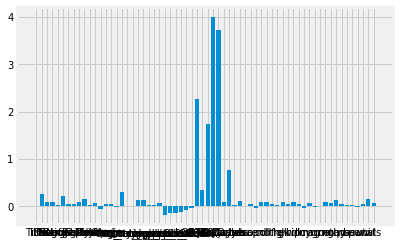

In [27]:
plt.bar(features,coefficients)

In [28]:
pd.DataFrame(lr_model_dict).sort_values(by=1,ascending=False).head(20)

,0,1
33,180 Days,4.0023
34,365 Days,3.7262
30,last year,2.2629
32,90 Days,1.7315
36,Copies,0.7673
31,30 Days,0.3402
16,avg_rating,0.2954
1,ISBN,0.2574
5,Nonfiction,0.2226
62,wal,0.1602


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Logistic Regression Model best F1 score 0.918 at prob decision threshold >= 0.829


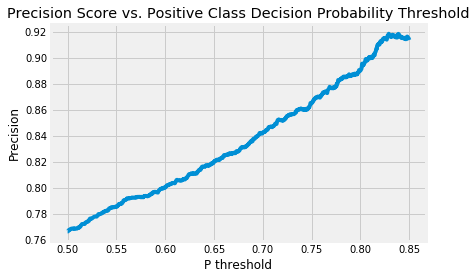

In [29]:
X_val_scaled = std_scale.transform(X_val)

thresh_ps = np.linspace(.50,.85,1000)
model_val_probs = lr_model.predict_proba(X_val_scaled)[:,1]   # first column is the probability for 0 condition
                                                              # second column is the probability for the 1 condition
precision_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    precision_scores.append(precision_score(y_val,model_val_labels))
    
plt.plot(thresh_ps, precision_scores)
plt.title('Precision Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('Precision')

best_precision_score = np.max(precision_scores) 
best_thresh_p = thresh_ps[np.argmax(precision_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_precision_score, best_thresh_p)) 


### Naive Bayes

In [30]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [31]:
model = naive_bayes.GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_train_predict = model.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Recall: ",recall_score(y_train,y_train_predict))         # Recall
print("Precision: ",precision_score(y_train,y_train_predict))   # Precision
print("f1: ",f1_score(y_train,y_train_predict))  

Accuracy:  0.7636285679284577
Recall:  0.9166771238549379
Precision:  0.6957142857142857
f1:  0.7910552818235964


In [33]:
y_val_predict = model.predict(X_val)

In [34]:
print("Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Recall: ",recall_score(y_val,y_val_predict))         # Recall
print("Precision: ",precision_score(y_val,y_val_predict))   # Precision
print("f1: ",f1_score(y_val,y_val_predict))  

Accuracy:  0.7585446527012127
Recall:  0.9079592606563561
Precision:  0.6922634454989934
f1:  0.785574412532637


In [35]:
confusion_matrix(y_train, model.predict(X_train) )

array([[5162, 3195],
       [ 664, 7305]])

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [37]:
# Try with different max features
rfmodel = RandomForestClassifier(n_estimators = 1000, max_features = 7,
                                min_samples_leaf = 4, n_jobs=4, max_depth=6)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_train_predict = rfmodel.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.8129364204336641
Train Recall:  0.853933994227632
Train Precision:  0.7826336975273146
Train f1:  0.8167306769083054


In [39]:
y_val_predict = rfmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict))  

Validation Accuracy:  0.8153252480705623
Validation Recall:  0.8525084873632591
Validation Precision:  0.7863604732080723
Validation f1:  0.8180995475113122


In [40]:
confusion_matrix(y_val, y_val_predict)

array([[2177,  614],
       [ 391, 2260]])

### GradientBoostingClassifier

In [41]:
# Try with different max features
gbmodel = GradientBoostingClassifier(n_estimators = 1000, max_features = 3,
                                min_samples_leaf = 10,learning_rate=0.005)
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [42]:
y_train_predict = gbmodel.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.8101800808526277
Train Recall:  0.8466557911908646
Train Precision:  0.7823515769944341
Train f1:  0.8132344964744169


In [43]:
y_val_predict = gbmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.8122013965453877
Validation Recall:  0.8468502451904941
Validation Precision:  0.7846906675987417
Validation f1:  0.8145863570391872


In [44]:
confusion_matrix(y_val, y_val_predict)

array([[2175,  616],
       [ 406, 2245]])

### XGBoost Classifier

In [45]:
import xgboost as xgb

In [46]:
gbm = xgb.XGBClassifier( 
                        n_estimators=40000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.15, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

# accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [47]:
y_train_predict = fit_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.8140389562660787
Train Recall:  0.8421382858576986
Train Precision:  0.7905524796795853
Train f1:  0.8155304411228581


In [48]:
y_val_predict = fit_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.8169790518191842
Validation Recall:  0.8430780837419841
Validation Precision:  0.7939609236234458
Validation f1:  0.8177826564215148


In [49]:
confusion_matrix(y_val, y_val_predict)

array([[2211,  580],
       [ 416, 2235]])

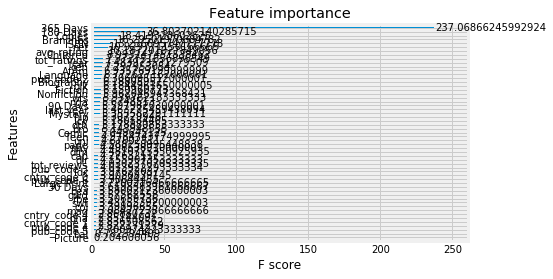

In [50]:
xgb.plot_importance(gbm, importance_type='gain')

### Neural Network

In [52]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout

'''
 In this network structure, note that we follow a very common heuristic of "funneling"
 to lower dimensional representations over time with multiple layers. Tuning the exact
 choice of number of nodes and layers is quite challenging and there aren't generically
 correct choices, but this heuristic often works pretty well.
'''

NN = Sequential()

NN.add(Dense(64, input_dim = 64)) # need feature input dim (30 features) for first hidden layer
NN.add(Activation('sigmoid'))

NN.add(Dense(124))
NN.add(Activation('sigmoid'))

#NN.add(Dropout(0.01))

NN.add(Dense(248))
NN.add(Activation('sigmoid'))

#NN.add(Dropout(0.01))

NN.add(Dense(124))
NN.add(Activation('sigmoid'))

NN.add(Dense(62))
NN.add(Activation('sigmoid'))

#NN.add(Dropout(0.01))

NN.add(Dense(32))
NN.add(Activation('sigmoid'))

NN.add(Dense(16))
NN.add(Activation('sigmoid'))

NN.add(Dense(1))
NN.add(Activation('sigmoid'))

NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])   #adam  #RMSProp
NN.fit(X_train, y_train, epochs=100, batch_size=500, verbose=1) # track progress as we fit

Epoch 1/100
16326/16326 [==============================] - 1s 49us/step - loss: 0.6940 - acc: 0.5062
Epoch 2/100
16326/16326 [==============================] - 0s 9us/step - loss: 0.6935 - acc: 0.5040
Epoch 3/100
16326/16326 [==============================] - 0s 9us/step - loss: 0.6927 - acc: 0.5091
Epoch 4/100
16326/16326 [==============================] - 0s 10us/step - loss: 0.6841 - acc: 0.5649
Epoch 5/100
16326/16326 [==============================] - 0s 10us/step - loss: 0.5361 - acc: 0.7843
Epoch 6/100
16326/16326 [==============================] - 0s 10us/step - loss: 0.4722 - acc: 0.7886
Epoch 7/100
16326/16326 [==============================] - 0s 10us/step - loss: 0.4547 - acc: 0.7952
Epoch 8/100
16326/16326 [==============================] - 0s 9us/step - loss: 0.4557 - acc: 0.7918
Epoch 9/100
16326/16326 [==============================] - 0s 9us/step - loss: 0.4442 - acc: 0.7974
Epoch 10/100
16326/16326 [==============================] - 0s 10us/step - loss: 0.4406 - acc: 

In [53]:
from sklearn.metrics import accuracy_score

y_train_pred = NN.predict_classes(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train F1: ", f1_score(y_train, y_train_pred))
print("-------------")
y_val_pred = NN.predict_classes(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print("Validation F1: ", f1_score(y_val, y_val_pred))

Train Accuracy:  0.8108538527502144
Train F1:  0.8132107428018388
-------------
Validation Accuracy:  0.8178978316795296
Validation F1:  0.8192595294546782
